<a href="https://colab.research.google.com/github/hoonsyang/colab/blob/master/adversarial-robustness-toolbox/classifier_blackbox_YANG_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
os.chdir('/content/drive/My Drive/Adversarial/adversarial-robustness-toolbox')
!pwd

/content/drive/My Drive/Adversarial/adversarial-robustness-toolbox


#ART Blackbox classifier - creating adversarial samples for remote classifiers

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt

from art.config import ART_DATA_PATH
from art.classifiers import BlackBoxClassifier
from art.attacks import HopSkipJump
from art.utils import to_categorical
from art.utils import load_dataset, get_file, compute_accuracy

#Deploy model and connect to API

In [0]:
client = 'TODO'
scoring_url = 'TODO'

#Make predictions

In [0]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str('mnist'))

In [0]:
def predict(x):
    x = np.array(x)
    scoring_data = {'values': (np.reshape(x, (x.shape[0],784))).tolist()}
    predictions = client.deployments.score(scoring_url, scoring_data)
    return to_categorical(predictions['values'], nb_classes=10)

classifier = BlackBoxClassifier(predict, x_train[0].shape, 10, clip_values=(0, 255))

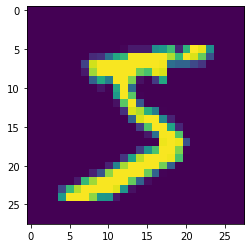

AttributeError: ignored

In [24]:
target_image = x_train[0]
plt.imshow(np.reshape(target_image.astype(np.float32), (28, 28)))
plt.show(block=False)
print('Prediction from API is: ' + str(np.argmax(classifier.predict(x_train[:1]), axis=1)[0]))

#Generate black box HopSkipJump attack

In [25]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(3):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)
    
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(np.reshape(x_adv[0].astype(np.float32), (28, 28)))
    plt.show(block=False)
    
    attack.max_iter = iter_step

AttributeError: ignored